## <center><sub><sup><sub><sup>Relazione di</sup></sub></sup></sub> <br> Laboratorio di Algoritmi e Strutture Dati</center>

In questo Jupyter Notebook affronteremo il secondo esercizio assegnato: confronto tra gli algoritmi di ordinamento *Insertion Sort* e *Merge Sort*. Per eseguire questo notebook utilizzeremo la versione 11.3.5 di Python.

### Introduzione al problema
Gli algoritmi di ordinamento vengono utilizzati per risolvere il problema dell'ordinamento: data una sequenza di $n$ numeri $A = <a_1, a_2, ..., a_n>$ trovare una permutazione di $A$ che chiameremo $A'=<a_1', a_2', ..., a_n'>$ con $a_i' \in A$ tale che $a_i' \leq a_{i+1}' \, \forall i \in {1, ... n-1}$. Tra i più noti abbiamo: *Bubble Sort*, *Insertion Sort*, *Merge Sort*, *Quicksort*, *Heap sort*.

#### Insertion Sort
Questo tipo di ordinamento è tale per cui ogni elemento viene confrontato con i precedenti per verificare se sia maggiore rispetto ad essi e nel caso non lo sia sposta tutti gli elementi dopo quello maggiore ad esso verso destra per inserirlo subito prima del maggiore. L'ordinamento avviene quindi sul posto, senza necessità di dover creare ulteriori sequenze di elementi. Si può comprendere
meglio attraverso il suo codice *Python*:

In [16]:
def insertion_sort(A: list):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = key

dove `A` è una lista contenente numeri.

Analizzando la complessità temporale di *Insertion Sort* con $n$ elementi si può notare che:
 - nel caso migliore, ovvero quando tutti gli elementi sono già ordinati, l'algoritmo impiega un tempo pari a $\Theta(n)$;
 - nel resto dei casi, ovvero casi medi e peggiori, l'algoritmo impiega un tempo pari a $\Theta(n^2)$ quindi quadratico.

Per quanto riguarda la complessità spaziale, come detto precedentemente, gli elementi vengono scambiati della lista vengono scambiati sul posto e non c'è alcuna ulteriore occupazione di memoria, se non quella della lista, quindi si considera questa come $\Theta(1)$.

### Merge sort

L'algoritmo di *Merge Sort* si basa sull'approccio *Divide et impera*, per cui il problema di ordinamento viene diviso ricorsivamente in due sottoproblemi fino quando la lista da ordinare non è composta da un solo elemento: in quel caso la lista è implicitamente ordinata e quindi si ha il caso base della ricorsione. *Merge sort* quindi divide ad ogni passo la lista in esame in due sottoliste rispetto all'elemento centrale della lista, e utilizza richiamando lo stesso algoritmo su di esse; una volta che gli algoritmi terminano si riordinano gli elementi delle due sottoliste ordinate in modo tale da avere la lista originaria ordinata. Vediamo l'algoritmo scritto in *Python*:

In [17]:
def merge(A: list, start: int, middle: int, end: int):
    left = A[start:middle] + [float("inf")]
    right = A[middle:end] + [float("inf")]
    i = 0
    j = 0
    for k in range(start, end):
        if left[i] <= right[j]:
            A[k] = left[i]
            i += 1
        else:
            A[k] = right[j]
            j += 1


def merge_sort(A: list, start: int = 0, end: int = -1):
    if end == -1:
        end = len(A)
    if end - start > 1:
        middle = (start + end) // 2
        merge_sort(A, start, middle)
        merge_sort(A, middle, end)
        merge(A, start, middle, end)

e la chiamata iniziale all'algoritmo viene fatta semplicemente chiamando <code>merge_sort(*lista*)</code>.

Anche in questo caso possiamo analizzare la complessità temporale, che risulta migliore in gran parte dei casi rispetto a *Insertion Sort*, infatti in tutti i casi (peggiore, migliore e medio) l'algoritmo ha sempre un costo pari a $\Theta(nlog_2n)$ con $n$ numero di elementi nella lista. Solo nel caso migliore si ha un costo maggiore rispetto a *Insertion Sort*. Analizzando invece la complessità spaziale si nota che ad ogni passo della ricorsione, l'algoritmo si crea una copia di una parte (o di tutta) la lista originale, pertanto ha una complessità spaziale pari a $O(n)$.

### Test svolti
Nei test predisposti verranno verificate solo le complessità temporali, infaati per l'analisi delle complessità spaziali *Python* non fornisce strumneti adeguati compatibili con Jupyter Notebbok per la misurazione dell'utilizzo di memoria se non con input enormi (si parla di liste con più di un milione di elementi) che conseguentemente richiedono tempi molto maggiori, infatti gli strumenti presenti tendono ad aumentare i tempi di esecuzione. Verranno quindi verificate solo le complessità temporale nei tre casi: migliore, medio e peggiore.

Per la misurazione dei tempi di esecuzione utilizzeremo la funzione qui di seguito che avvalendosi della funzione *time()* della libreria *Python* *time* calcola il tempo come differenza tra un timestamp inziale ottenuto immediatamente prima l'esecuzione della funzione e il timestamp finale ottenuto immediatamente dopo il termine delle funzione. Non è una misurazione precisa, ma accettabile per i test che dovremmo eseguire.

In [18]:
import time


def time_function(function, *args, **kwargs):
    start = time.time()
    function(*args, **kwargs)
    return time.time() - start

Dopo che l'esecuzione della funzione di ordinamento è stata eseguita (e ne sono stati calcolati i tempi) una funzione scritta qui di seguito verifica la correttezza dell'ordinamento (crescente), e nel caso questa non fosse verificata genera un'eccezione che termina l'esecuzione del codice.

In [19]:
def check_sort(list):
    if len(list) <= 1:
        return True
    prev = list[0]
    for val in list[1:]:
        if prev > val:
            return False
        prev = val
    return True

Parlando invece dei dati che verranno passati alle funzioni di ordinamento, tenendo conto di dover misurare le prestazioni degli algoritmi nei 3 casi sopra citati, dovranno essere utilizzate 3 sorgenti di dati per l'analisi:
 - nei casi migliori verranno generati numeri ordinati (e sempre diversi) in modo crescente attraverso la funzione *range* di *Python*;
 - nei casi peggiori verranno generati numeri ordinati (e sempre diversi) in modo decrescente sempre sfruttando la funzione *range*;
 - nei casi medi le liste di numeri verranno generate in maniera casuale usando la funzione della libreria *numpy* *np.random.randint* senza però garantire di avere sempre numeri diversi all'interno della lista.
Le liste di numeri vengono generate in modo tale da avere un numero crescente di elementi, che parte da 500 fino ad arrivare a 5000 con un avanzamento di 500 elementi a volta.

I test vengono ripetuti su ogni singola lista di elementi per tre volte, per ogni algoritmo, e alla fine viene calcolata la mediana di questi tempi, in modo da evitare outlier nei grafici corrispondenti.

In [20]:
import numpy as np

ROUNDS = 3
RANGE = range(500, 5100, 500)
FUNCTIONS = {insertion_sort: "Insertion Sort", merge_sort: "Merge Sort"}

samples = {
    "worst": [list(range(size, -1, -1)) for size in RANGE],
    "average": [list(np.random.randint(size, size=size)) for size in RANGE],
    "best": [list(range(size)) for size in RANGE],
}
results = {
    function: {
        k: [{r: None for r in range(ROUNDS)} for i in range(len(samples[k]))]
        for k in samples.keys()
    }
    for function in FUNCTIONS.keys()
}

for r in range(ROUNDS):
    for function in results.keys():
        for sample_type, samples_list in samples.items():
            for sample_index, sample in enumerate(samples_list):
                sample_instance = list(sample)
                results[function][sample_type][sample_index][r] = time_function(
                    function, sample_instance
                )
                if not check_sort(sample_instance):
                    raise Exception("Sample not sorted correctly")

for r in range(ROUNDS):
    for function in results.keys():
        for sample_type, samples_list in samples.items():
            for sample_index in range(len(samples_list)):
                times = results[function][sample_type][sample_index]
                times["median"] = np.median(list(times.values()))

In [26]:
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt


def show_plot(sample_type):
    for function, name in FUNCTIONS.items():
        plt.plot(
            RANGE,
            [values["median"] for values in results[function][sample_type]],
            label=name,
        )
    plt.legend(loc="best")
    plt.xlabel("Elementi")
    plt.ylabel("Tempo (s)")
    plt.show()
    df = pd.DataFrame(
        [
            [
                els,
                results[insertion_sort][sample_type][index]["median"],
                results[merge_sort][sample_type][index]["median"],
            ]
            for index, els in enumerate(RANGE)
        ],
        columns=["Elementi", "Insertion Sort", "Merge Sort"],
    )
    display(df)

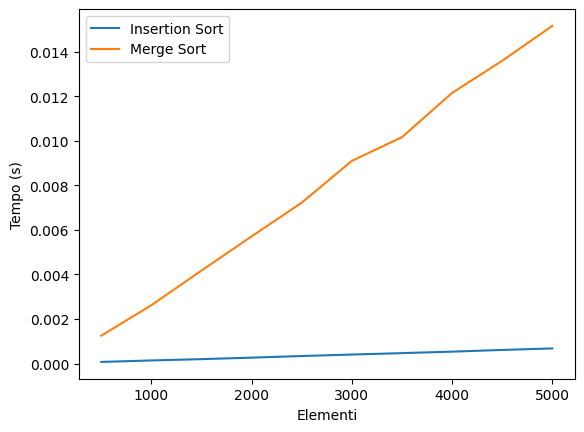

,Elementi,Insertion Sort,Merge Sort
0,500,0.000076,0.001255
1,1000,0.000142,0.002623
2,1500,0.000200,0.004177
3,2000,0.000268,0.005709
4,2500,0.000340,0.007221
5,3000,0.000407,0.009097
6,3500,0.000470,0.010161
7,4000,0.000537,0.012145
8,4500,0.000613,0.013589
9,5000,0.000681,0.015154


In [27]:
show_plot("best")

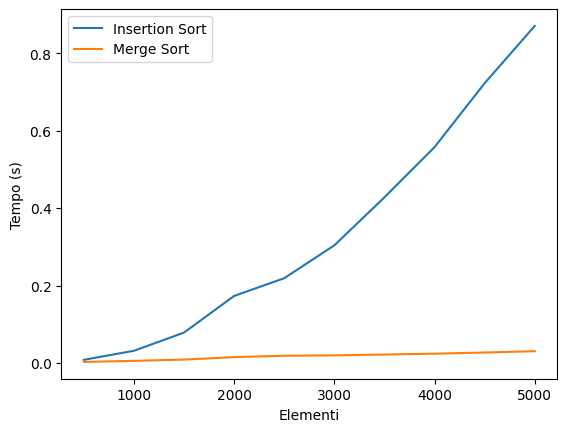

,Elementi,Insertion Sort,Merge Sort
0,500,0.008253,0.002844
1,1000,0.031585,0.005624
2,1500,0.078618,0.008904
3,2000,0.173206,0.015215
4,2500,0.218982,0.018795
5,3000,0.303845,0.019800
6,3500,0.427808,0.021936
7,4000,0.557495,0.024170
8,4500,0.722420,0.027078
9,5000,0.870392,0.030627


In [23]:
show_plot("average")

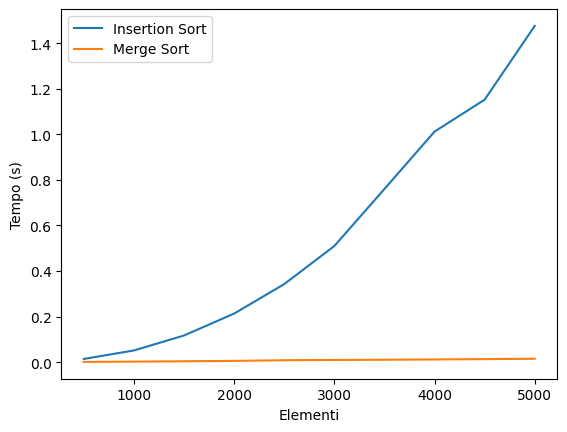

,Elementi,Insertion Sort,Merge Sort
0,500,0.014400,0.001302
1,1000,0.051621,0.002725
2,1500,0.117289,0.004253
3,2000,0.213385,0.005752
4,2500,0.342629,0.008773
5,3000,0.509857,0.009960
6,3500,0.760084,0.010787
7,4000,1.011781,0.012181
8,4500,1.151939,0.013629
9,5000,1.475540,0.015239


In [24]:
show_plot("worst")